#### Import Neccessary Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve, validation_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from xgboost import (XGBClassifier, plot_importance)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Import and Exploring Data Set

In [5]:
df = pd.read_csv('glass.csv')

In [6]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
df = df.drop('Id', axis =1)

In [21]:
features = df.columns[:-1].tolist()
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [22]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

#### Summarize the distribution of Numerical Values

In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##### The features are not on same scale, Si has mean of 72.65 while Fe has mean value of 0.057. Features should be on same scale for alogrithms such as Logistic Regression to converge smoothly

In [24]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

##### The dataset is pretty imbalanced. The instances of types 1 and 2 constitute more than 67% of the glass types

### DATA VISUALIZATION

#### Univariate Plots

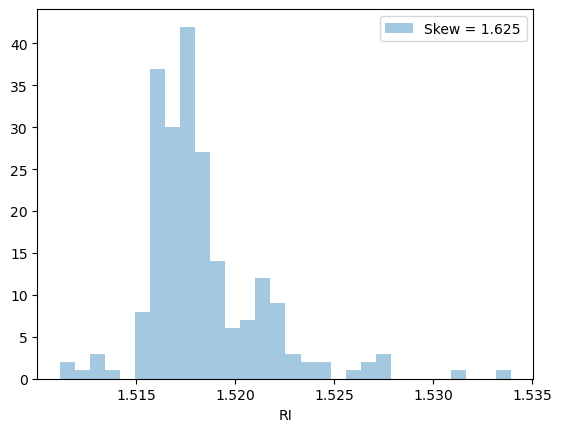

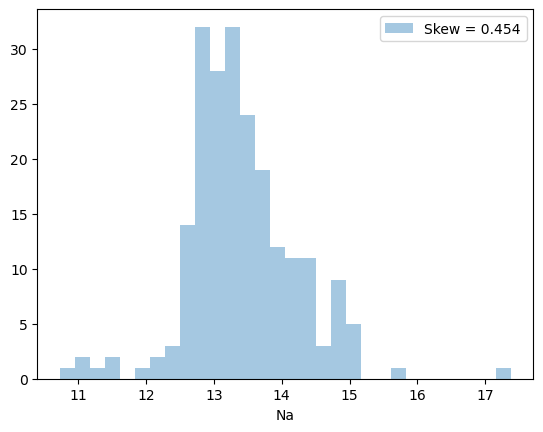

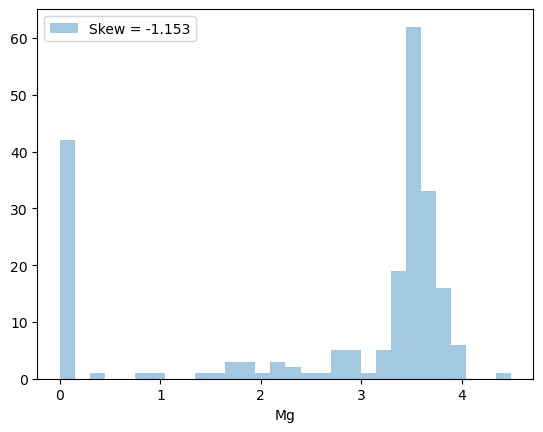

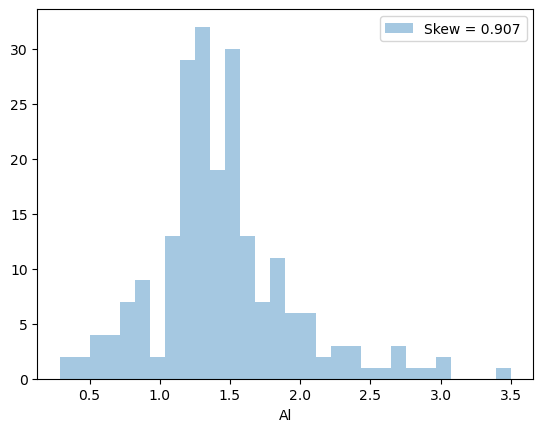

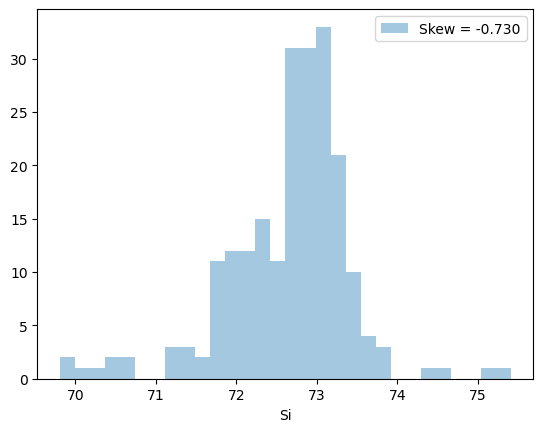

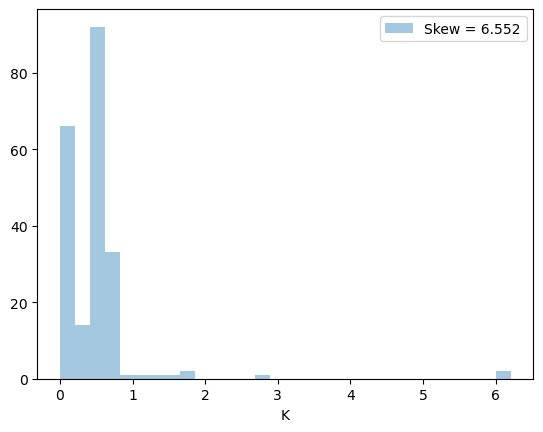

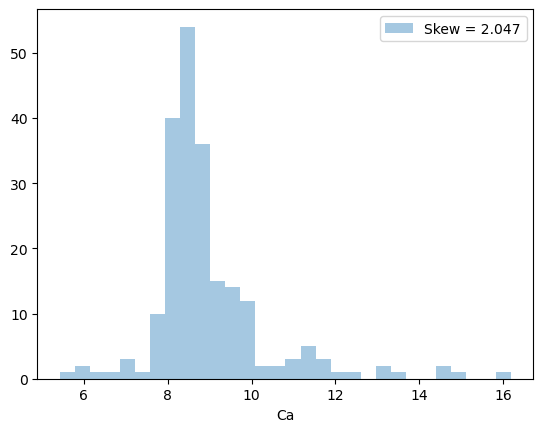

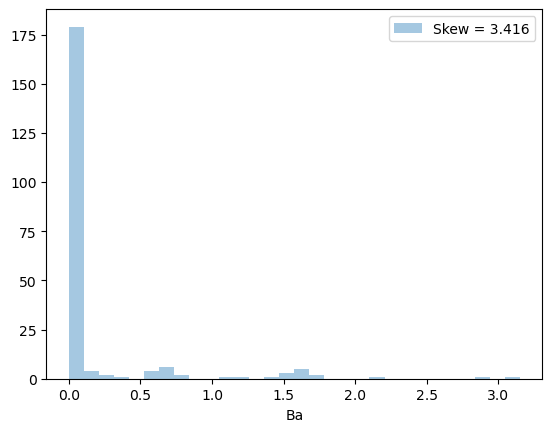

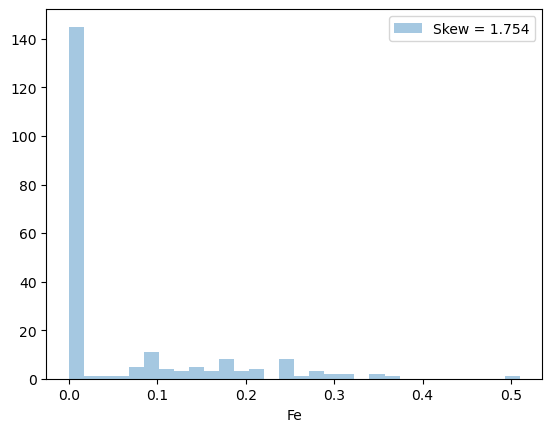

In [25]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

##### None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of pottassium (K) and Barium (Ba) seem to contain outliers. Let's identify the indices of the observations containing outliers using Box Plot.

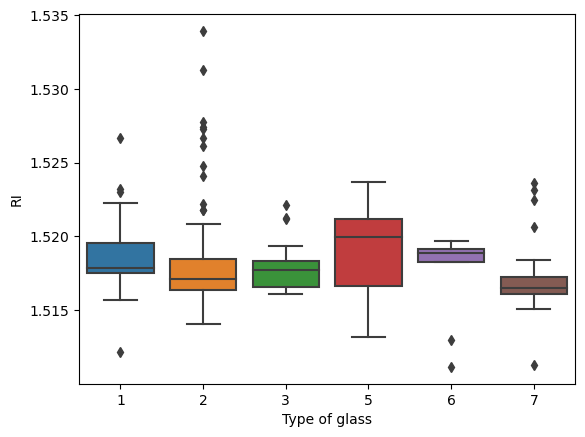

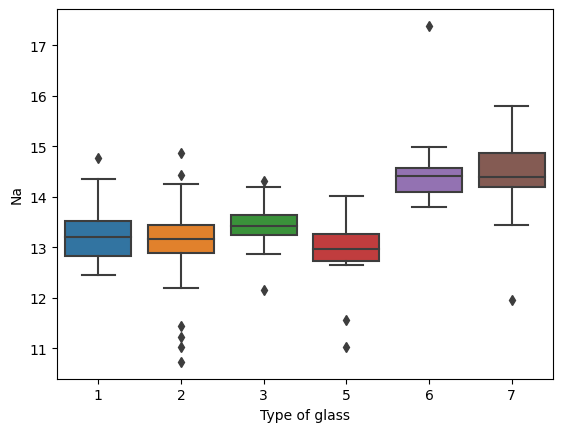

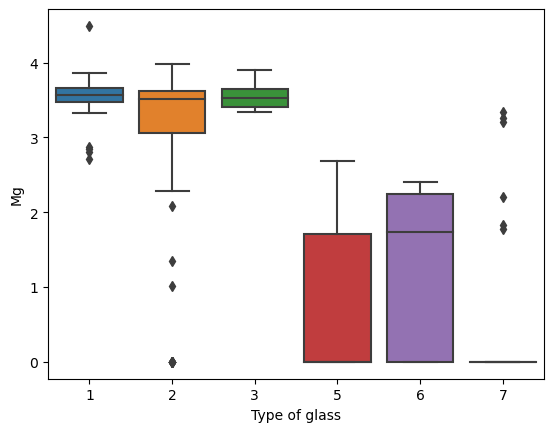

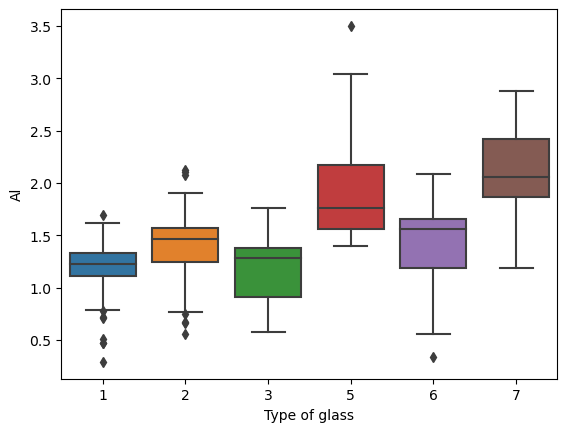

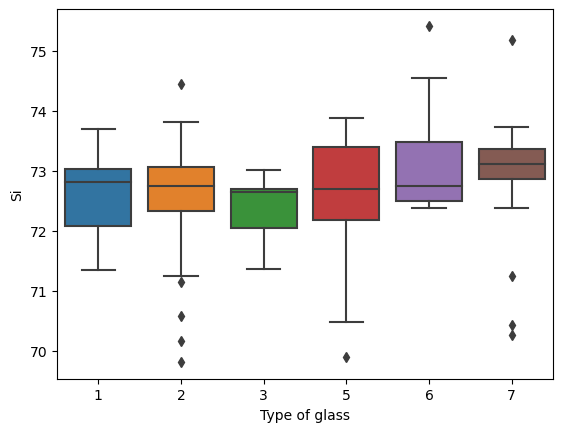

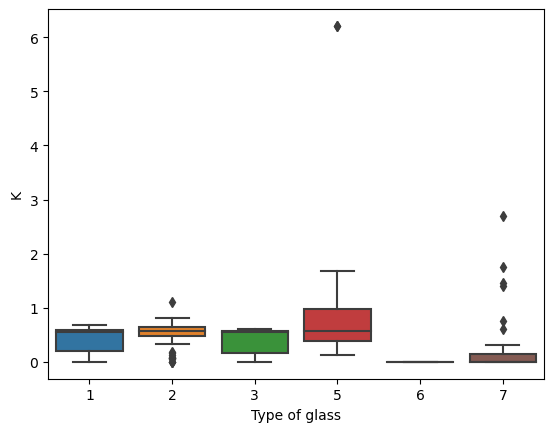

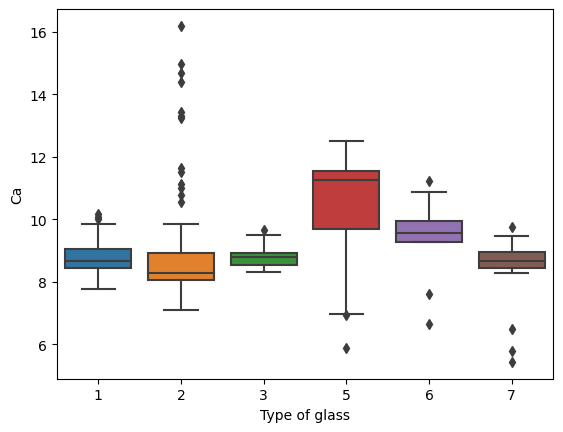

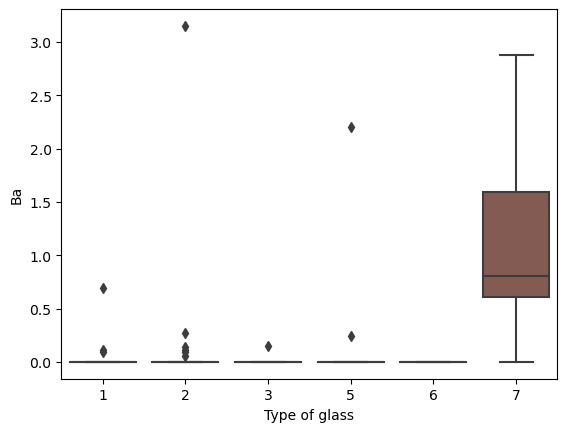

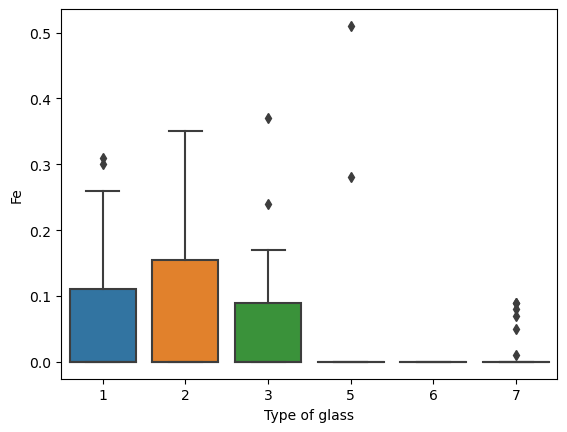

In [26]:
feature_names = df.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type of glass', y=feature_names[i], data=df)

##### The Diamond Shaped dots outside the box plot indicates the outliers. There are some extreme cases in K, Ba and Fe. That's why it is neccessary to rule them out

### Multivariate Plot

<Figure size 800x800 with 0 Axes>

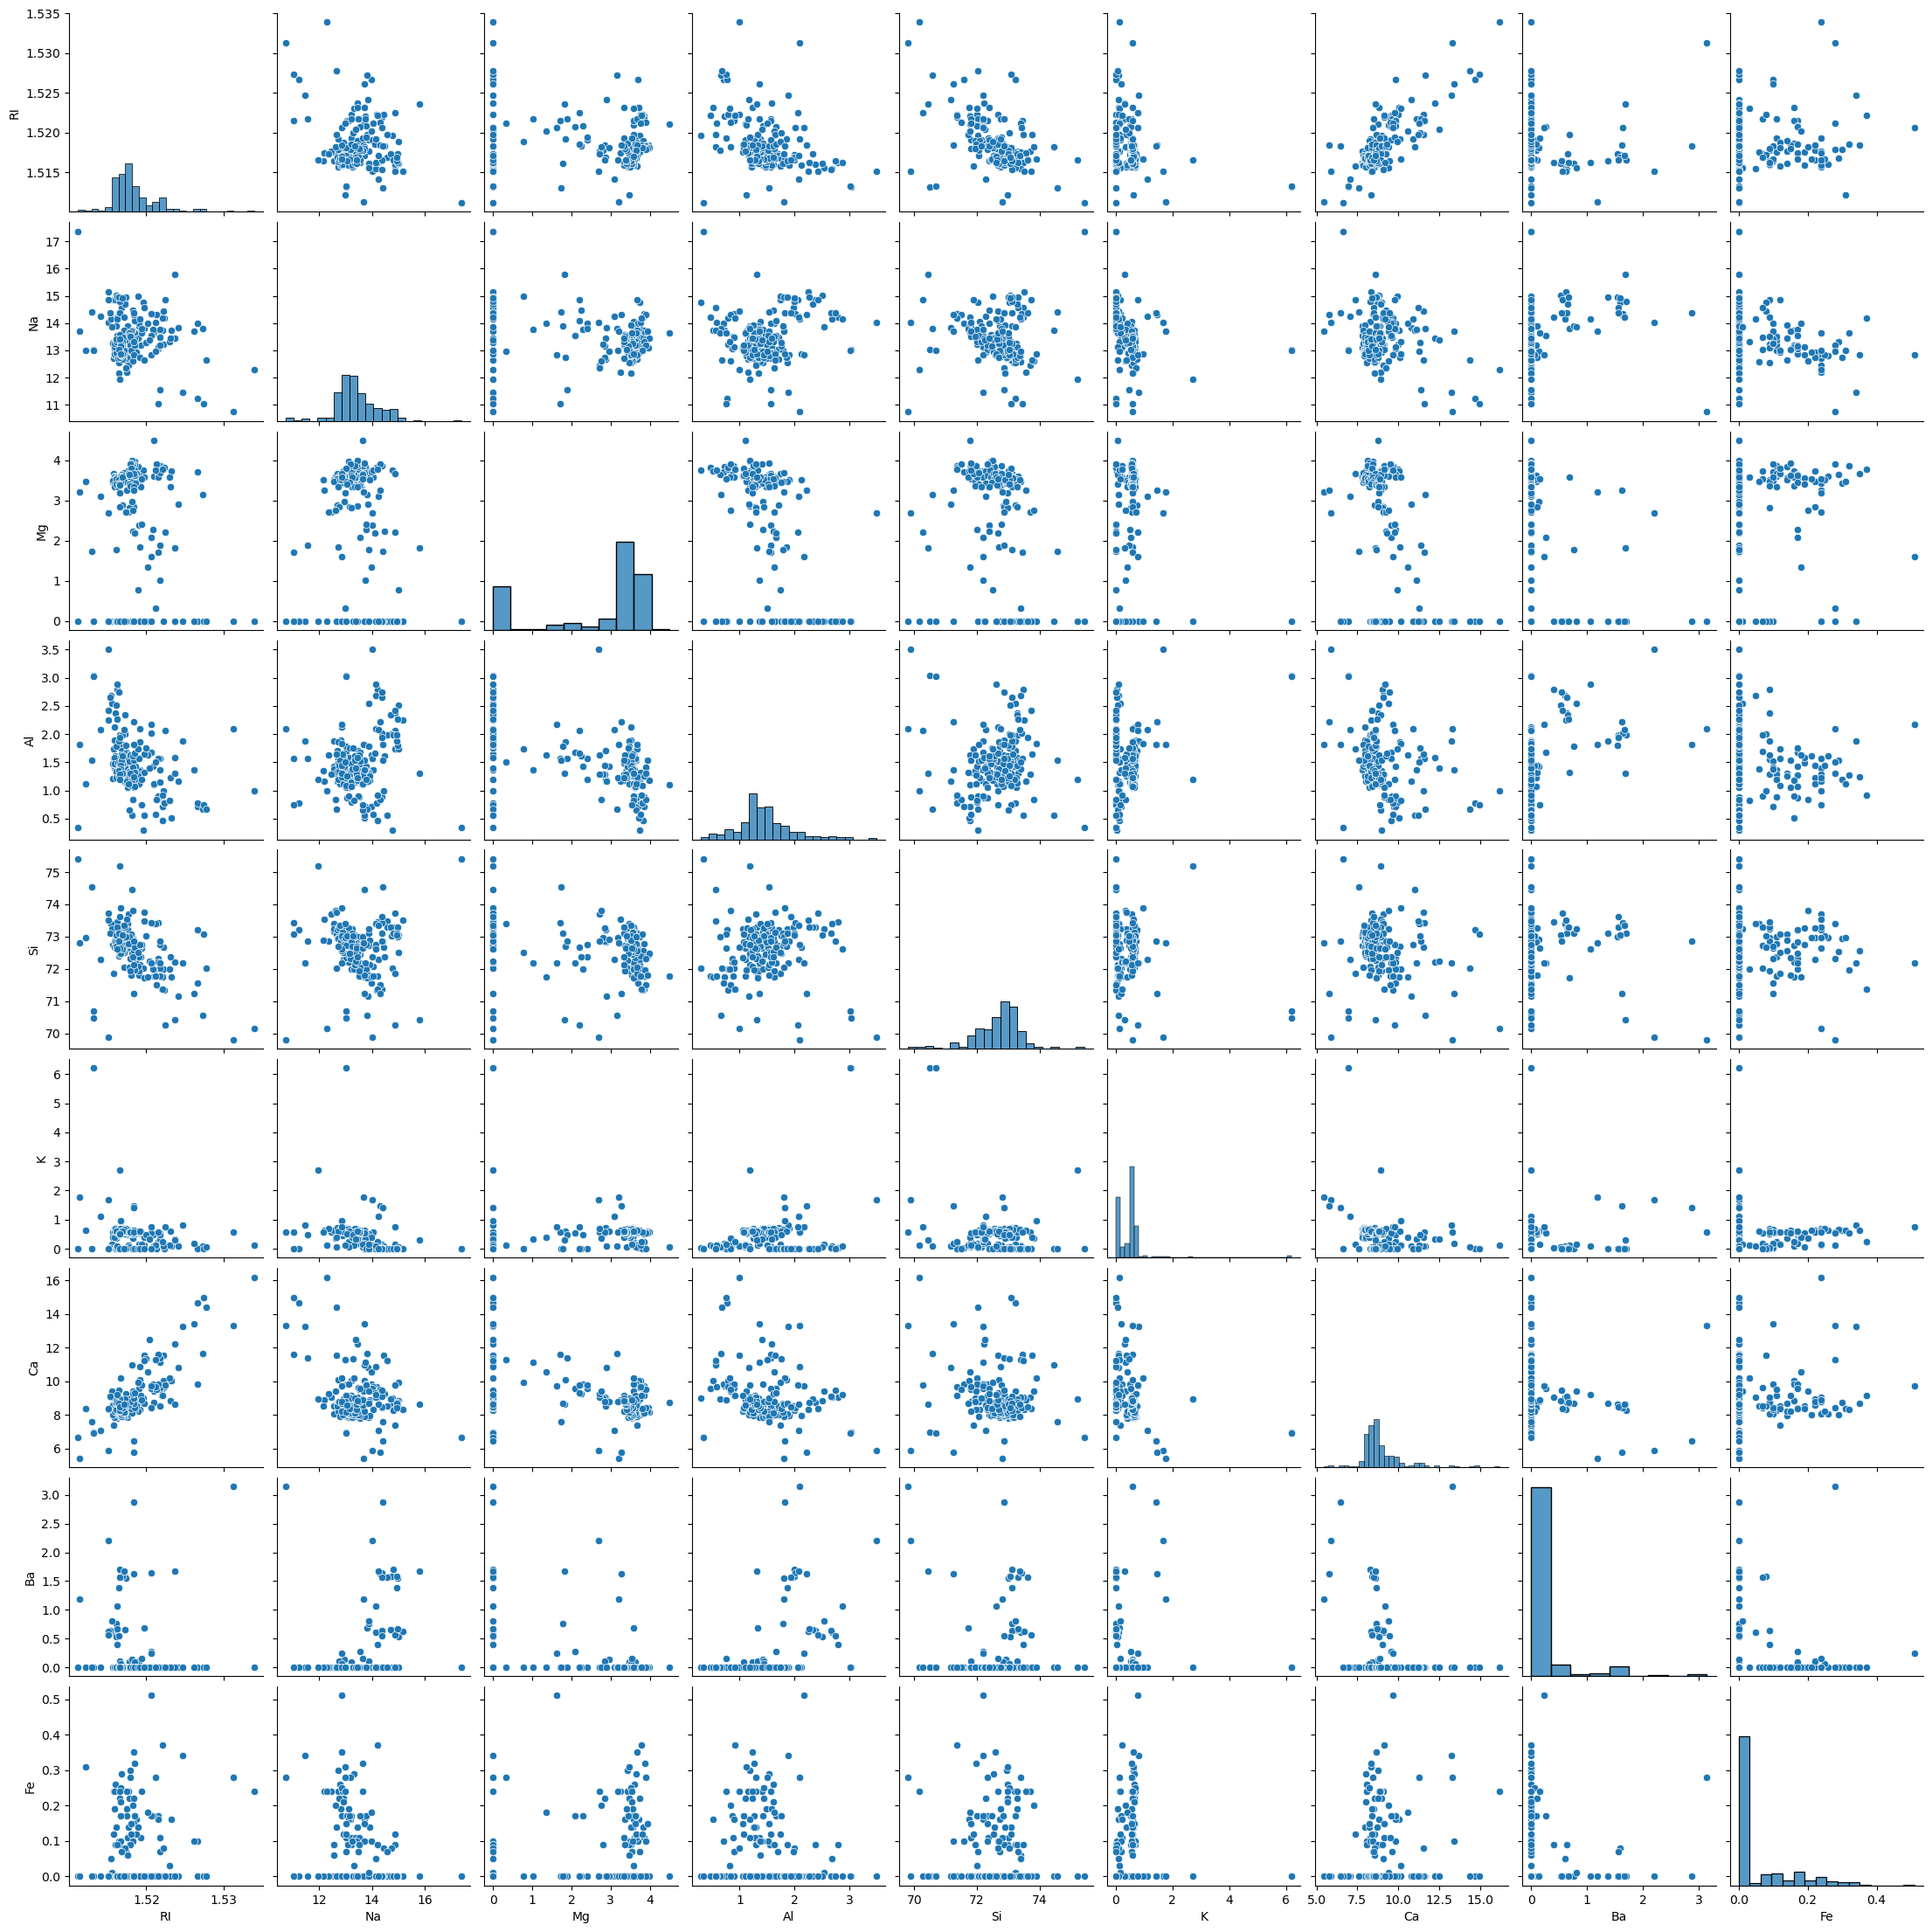

In [27]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features], palette='coolwarm')
plt.show()

##### Let's Examine Heatmap of the Correlations

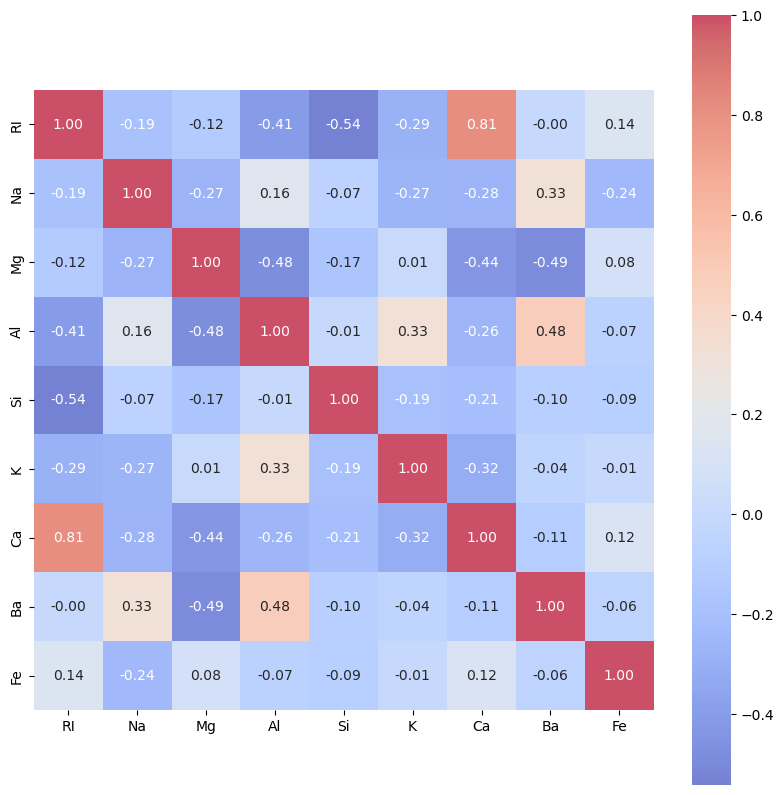

In [28]:
corr = df[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',annot_kws={'size': 10},
           xticklabels= features, yticklabels= features, alpha = 0.7, cmap='coolwarm')
plt.show()

##### There seems to be a strong positive correlation between RI and Ca. This hints to perform Principal component analysis in order to decorrelate some of the input features

## Data Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Removing Outliers

In [31]:
from collections import Counter

In [32]:
def outlier_hunt(df):
    
    outlier_indices = []
    
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outliers_indices.items() if v > 2 )
    
    return multiple_outliers

print('The Dataset Contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

outliers_indices = outlier_hunt(df[features])
df = df.drop(outliers_indices).reset_index(drop=True)
print(df.shape)

The Dataset Contains 14 observations with more than 2 outliers
(200, 10)


##### Removing obsevations with multiple outliers ( More than 2 ) leaves us with 200 observations to learn from.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

##### Dividing the dataset in test case and training set

In [39]:
X = df[features]
y = df['Type of glass']

seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

### Data Transformation

In [41]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Evaluate Alogrithms

### Compare Alogrithms

(200, 10)
SVC: 70.625000 (+/- 9.291293) performed in 82.272066 seconds
KNN: 68.125000 (+/- 11.336473) performed in 0.533479 seconds
RF: 70.000000 (+/- 9.185587) performed in 3.396065 seconds
Ada: 51.250000 (+/- 6.731456) performed in 2.760582 seconds
ET: 73.750000 (+/- 8.750000) performed in 1.823618 seconds
GB: 67.500000 (+/- 11.110243) performed in 5.395577 seconds
LR: nan (+/- nan) performed in 0.513264 seconds


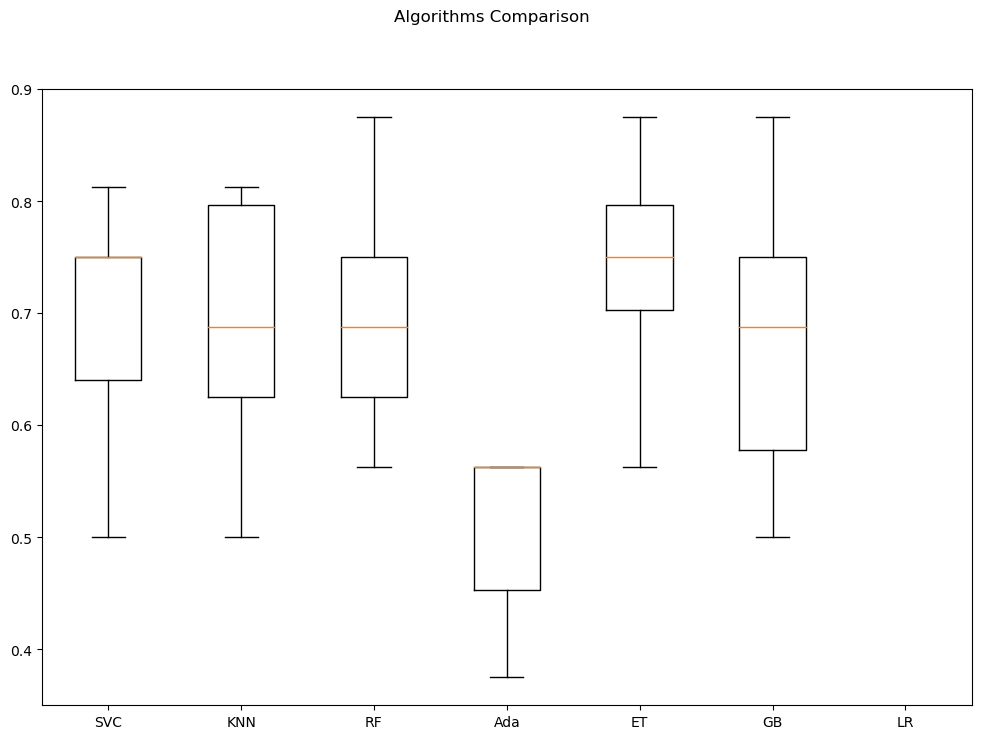

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from time import time

n_components = 5
pipelines = []
n_estimators = 200

print(df.shape)

seed = 42

pipelines.append(('SVC',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('SVC', SVC(random_state=seed))])))

pipelines.append(('KNN',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('KNN', KNeighborsClassifier())])))

pipelines.append(('RF',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators))])))

pipelines.append(('Ada',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('Ada', AdaBoostClassifier(random_state=seed, n_estimators=n_estimators))])))

pipelines.append(('ET',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators))])))

pipelines.append(('GB',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('GB', GradientBoostingClassifier(random_state=seed))])))

pipelines.append(('LR',
                  Pipeline([
                      ('sc', StandardScaler()),
                      ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('LR', LinearRegression())])))

results, names, times = [], [], []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()

    cv_results = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=num_folds), scoring=scoring, n_jobs=-1)

    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 100*cv_results.std(), t_elapsed)

    print(msg)

fig = plt.figure(figsize=(12, 8))
fig.suptitle("Algorithms Comparison")
ax = fig.add_subplot(1, 1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

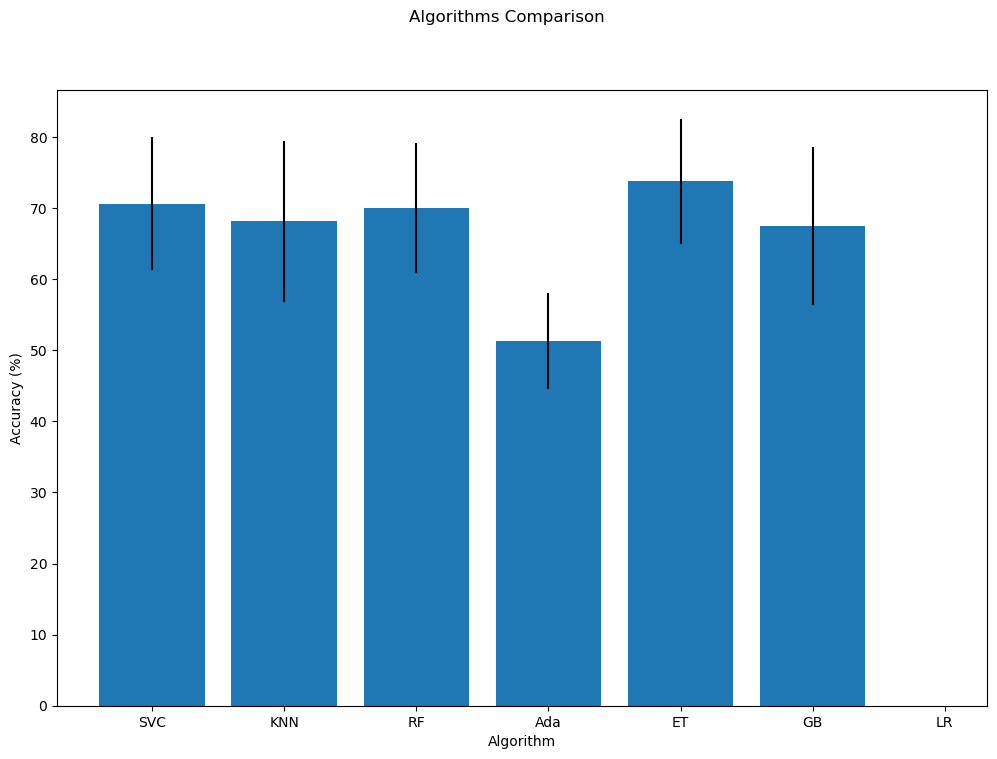

In [63]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Algorithms Comparison")
ax = fig.add_subplot(1, 1, 1)

ax.bar(names, [100 * np.mean(result) for result in results], yerr=[100 * np.std(result) for result in results])

ax.set_xlabel("Algorithm")
ax.set_ylabel("Accuracy (%)")

plt.show()

## Observation - The Best Performance is achieved by ExtraTreesClassifiers

### Saving the model

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(X, y)

ExtraTreesClassifier()

In [79]:
y_pred = ET.predict(X)

### Results - 

In [80]:
print("Predicted Glass Types:")
print(y_pred)

Predicted Glass Types:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [81]:
classifications = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed (none in this database)",
    5: "containers",
    6: "tableware",
    7: "headlamps"
}

predicted_classifications = [classifications[prediction] for prediction in y_pred]

In [82]:
print("Predicted Glass Types with Classifications:")
for glass_type, classification in zip(y_pred, predicted_classifications):
    print(f"{glass_type} - {classification}")

Predicted Glass Types with Classifications:
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_proc

### Dumping the Project

In [91]:
import pickle
final_model = ExtraTreesClassifier()

model_filename = 'Glass Prediction.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)